# Sonar ML
source: (https://www.kaggle.com/mattcarter865/mines-vs-rocks)

## Download Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aisudev","key":"94b743e8aaed000695c7b1cc0c261a92"}'}

In [2]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 kaggle.json
! kaggle datasets download -d mattcarter865/mines-vs-rocks

  0% 0.00/29.1k [00:00<?, ?B/s]
100% 29.1k/29.1k [00:00<00:00, 46.7MB/s]


In [3]:
! unzip mines-vs-rocks.zip

Archive:  mines-vs-rocks.zip
  inflating: sonar.all-data.csv      


## EDA

In [210]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sonar = pd.read_csv('/content/sonar.all-data.csv')
sonar.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [211]:
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [212]:
sonar.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,0.236376,0.250666,0.273544,0.297689,0.321429,0.379217,0.416495,0.453055,0.504797,0.563449,0.609209,0.624841,0.648010,0.673223,0.675444,0.700148,0.702115,0.693473,0.641895,0.581871,0.506281,0.439903,0.416761,0.401535,0.390343,0.382597,0.362331,0.338353,0.324986,0.311385,0.290403,0.278269,0.246368,0.213053,0.196909,0.160738,0.122537,0.091217,0.051995,0.020366,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,0.132923,0.140264,0.141262,0.164075,0.205158,0.232975,0.264213,0.261947,0.258614,0.263225,0.258434,0.256373,0.250335,0.239555,0.245520,0.237768,0.246252,0.237631,0.240818,0.220864,0.212917,0.213389,0.206907,0.230499,0.257756,0.262755,0.239546,0.212655,0.199210,0.179076,0.170717,0.169137,0.139308,0.132795,0.151924,0.134254,0.087155,0.062496,0.036029,0.013673,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,0.128200,0.133450,0.165750,0.176100,0.166500,0.195900,0.205500,0.241950,0.299050,0.350450,0.397550,0.406350,0.455250,0.540450,0.524800,0.543550,0.529800,0.533950,0.461300,0.414250,0.349300,0.284100,0.257350,0.217550,0.178550,0.154000,0.160000,0.174250,0.172450,0.185900,0.164100,0.158700,0.155200,0.126850,0.094450,0.068400,0.064200,0.044950,0.026300,0.011500,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,0.225100,0.249700,0.265500,0.281900,0.284000,0.307500,0.306800,0.370900,0.434800,0.543000,0.627500,0.667000,0.700700,0.701200,0.722100,0.754500,0.753900,0.731700,0.682500,0.607400,0.490600,0.430300,0.390300,0.349700,0.310800,0.319500,0.303900,0.310400,0.282900,0.279000,0.260500,0.244400,0.221100,0.177600,0.147300,0.121100,0.101500,0.077700,0.044900,0.017900,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,0.301800,0.331600,0.351500,0.386950,0.453050,0.536050,0.660050,0.679100,0.731900,0.809450,0.818050

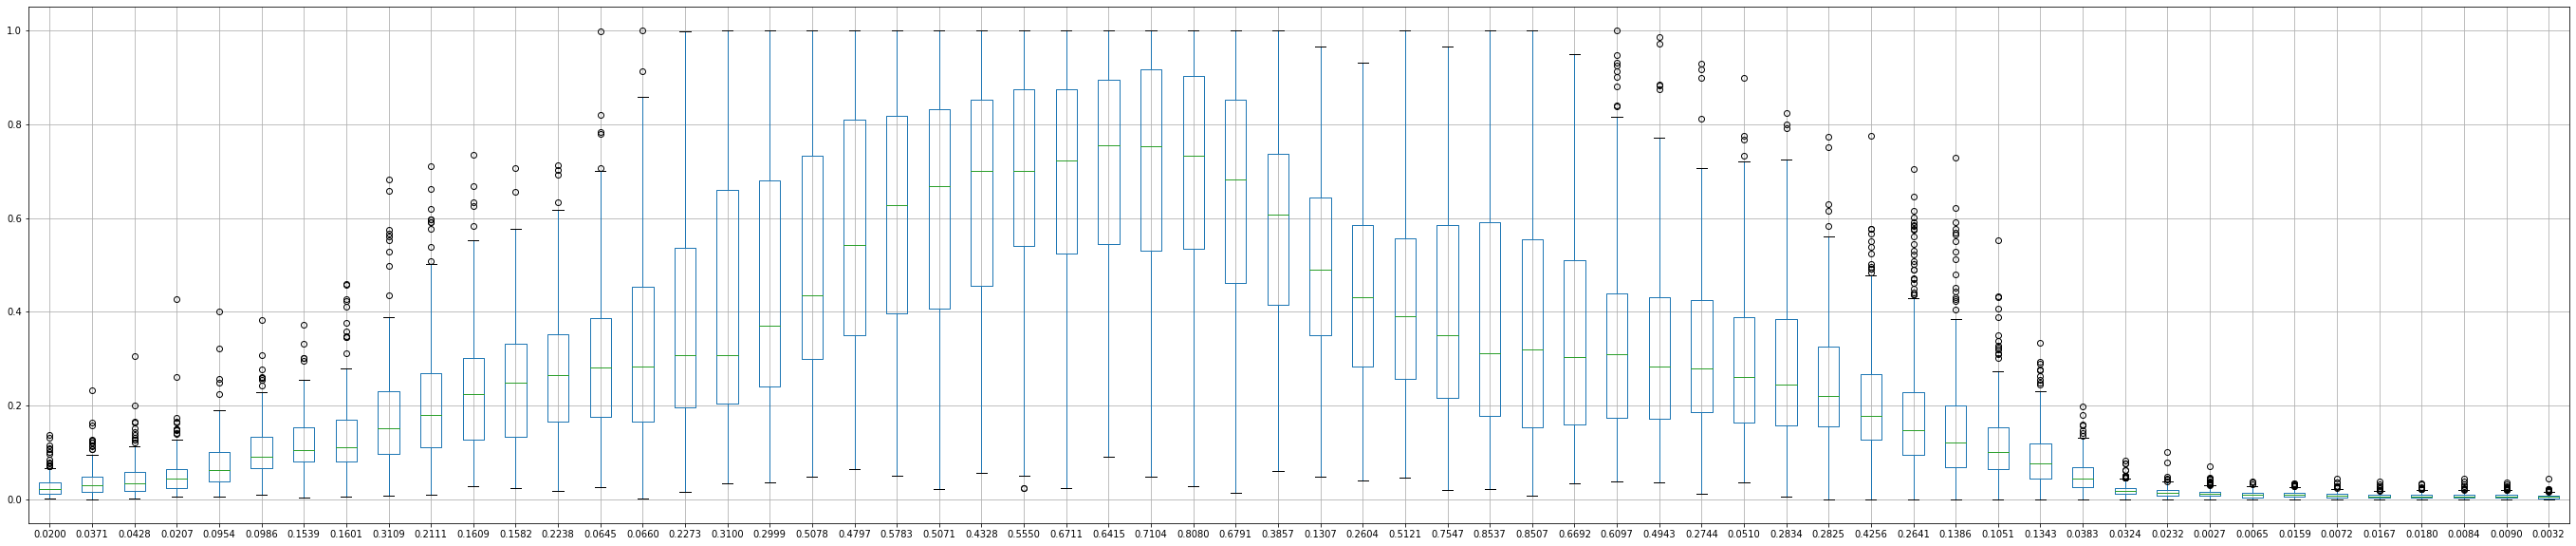

In [213]:
sonar.boxplot(figsize=(48, 10))
plt.show()

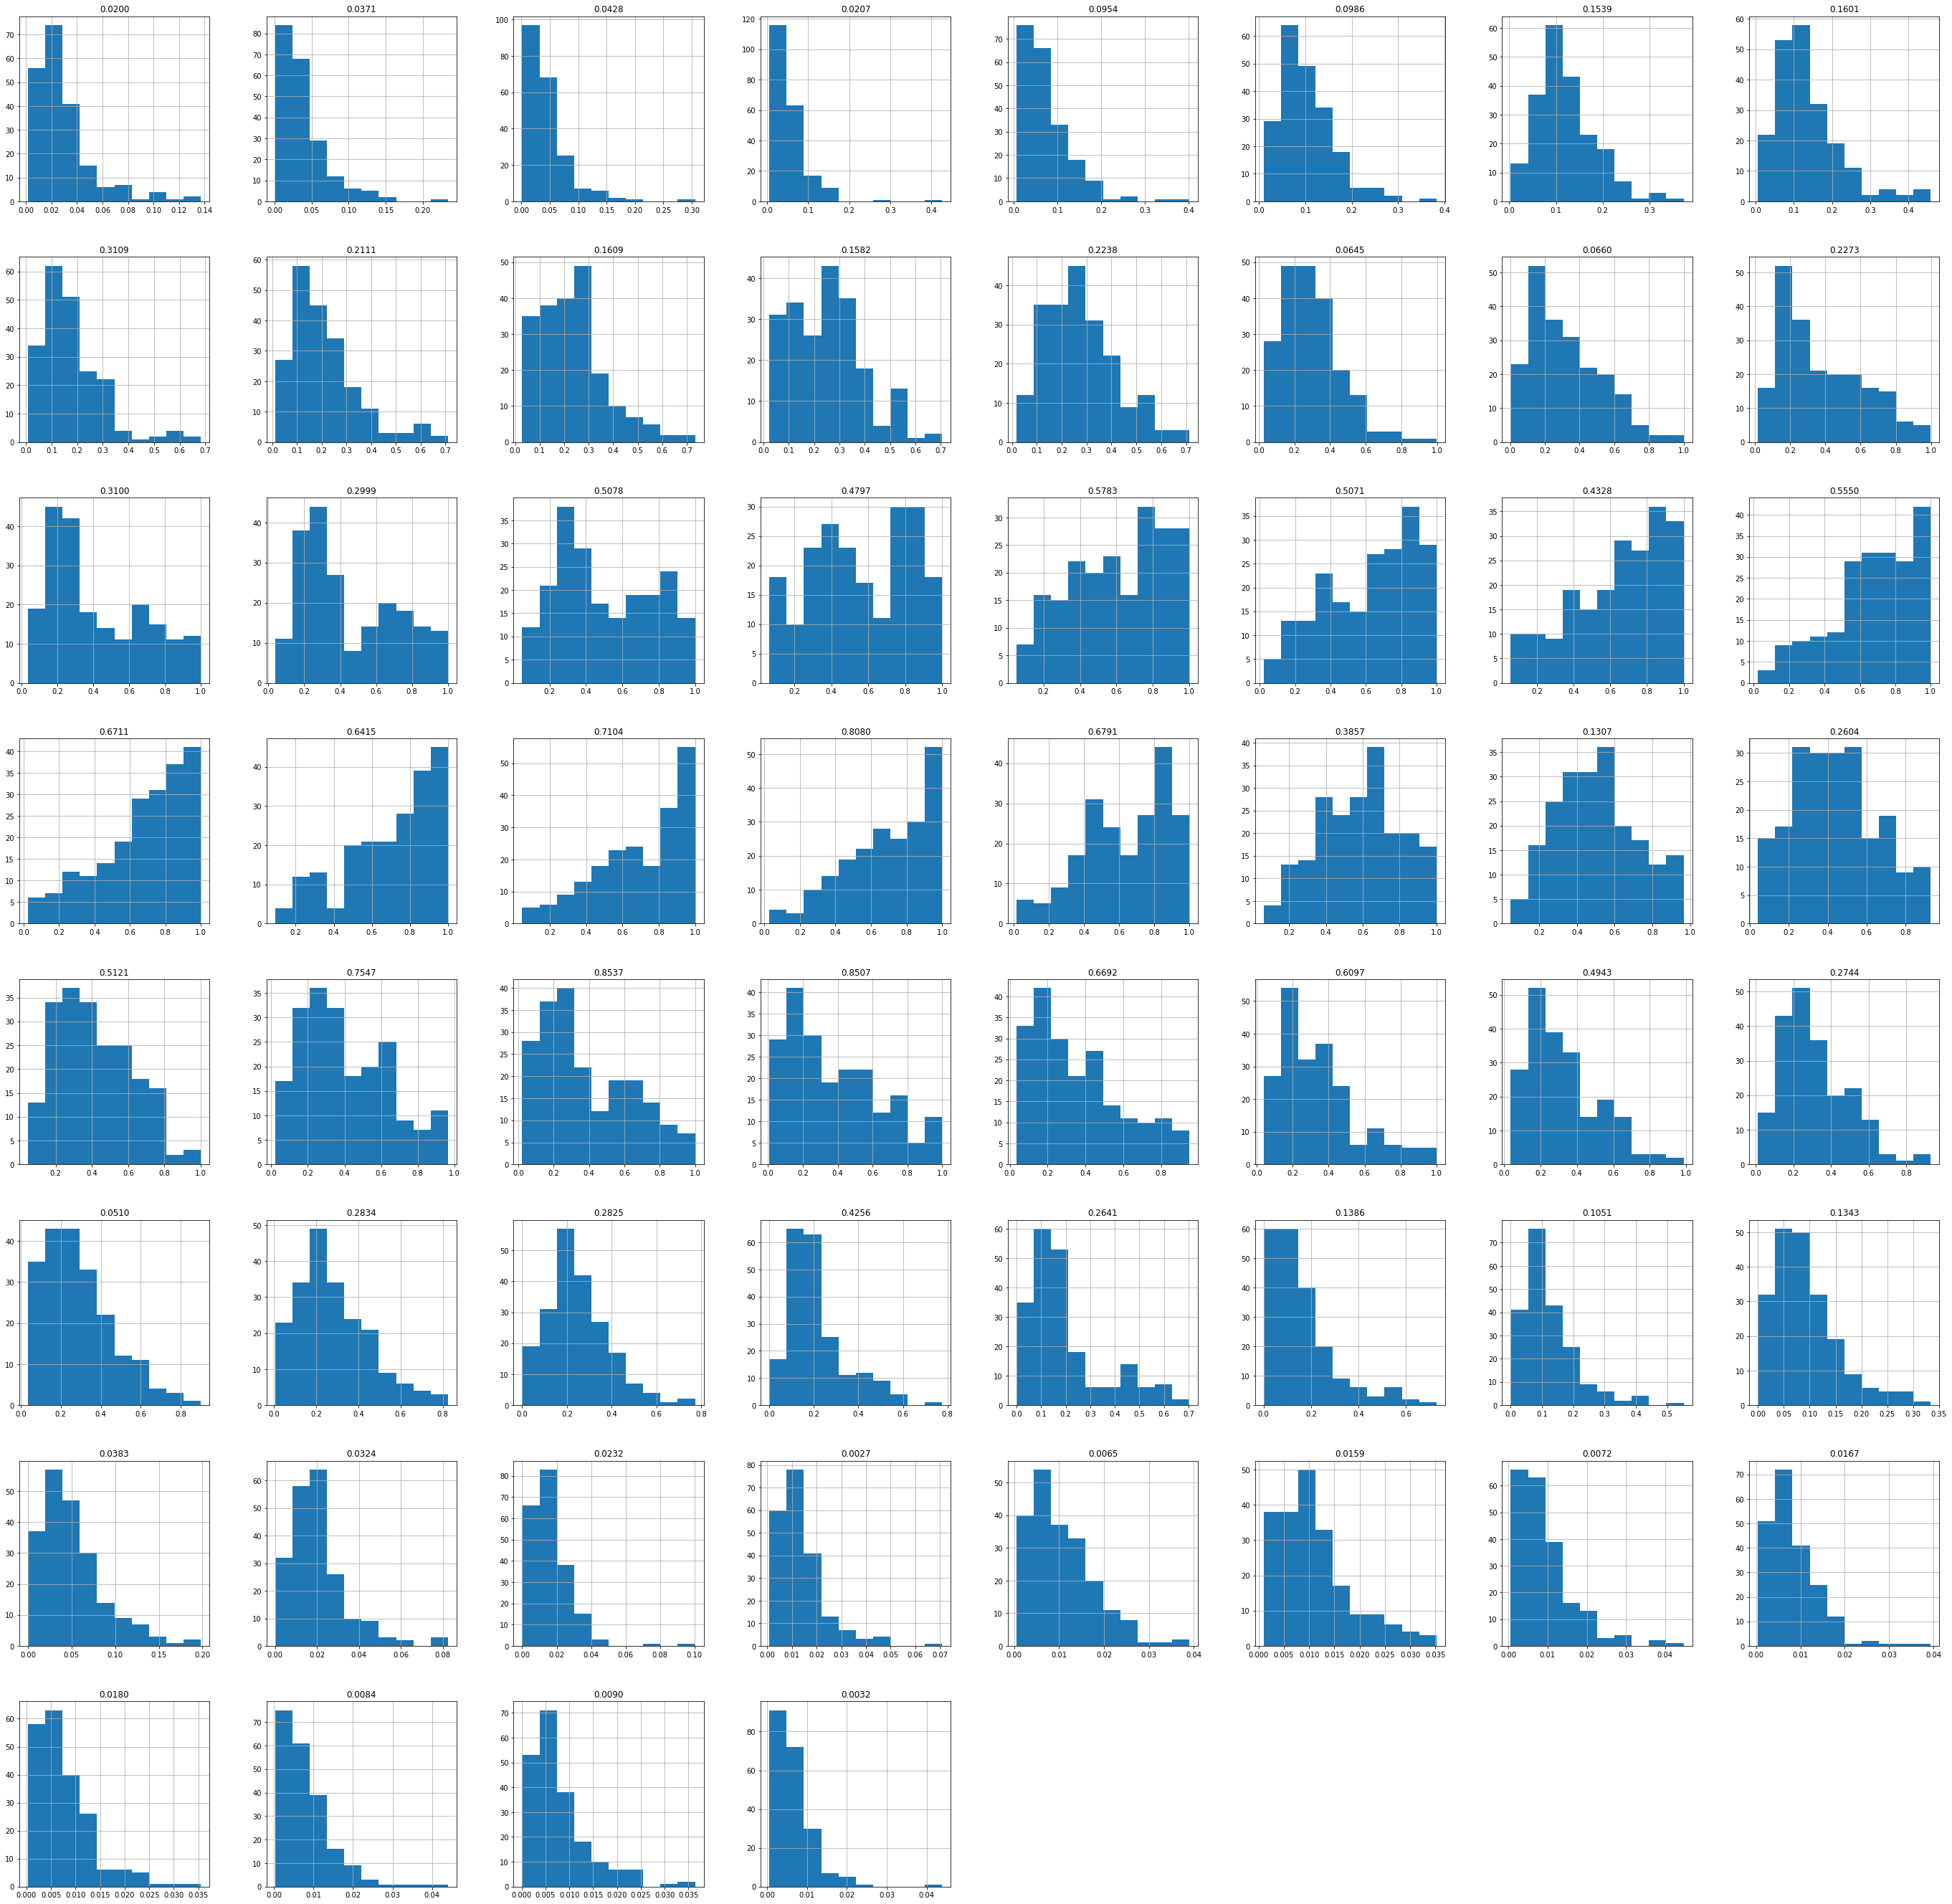

In [214]:
sonar.hist(figsize=(48, 48))
plt.show()

In [215]:
rock = []
for ind, row in sonar.iterrows():
  if row['R'] == 'R':
    rock.append(1)
  else:
    rock.append(0)

sonar.drop(['R'], axis=1, inplace=True)
sonar['rock'] = rock
sonar

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,rock
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,

In [216]:
corr = sonar.corr()
corr.style.background_gradient('coolwarm')

## Test Modeling

In [217]:
def displaySplitSet(x_train, x_test, y_train, y_test):
  print('Training Set:', x_train.shape, y_train.shape)
  print('Test Set:', x_test.shape, y_test.shape)

In [218]:
from sklearn.model_selection import train_test_split
x = np.array(sonar.iloc[:, :-1])
y = np.array(sonar.iloc[:, -1:]).reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, shuffle=True, random_state=42)
displaySplitSet(x_train, x_test, y_train, y_test)

Training Set: (144, 60) (144,)
Test Set: (63, 60) (63,)


### Quick Prediction Function

In [219]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

def QuickPrediction(x_train, x_test, y_train, y_test):
  models = {
      'SGD':SGDClassifier(),
      'KNN':KNeighborsClassifier(),
      'RForest':RandomForestClassifier(),
      'SVM':SVC()
  }

  for key, model in models.items():
    print('============================\n')
    print('-'+key)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('True Set:', y_test[:10])
    print('Pred Set:', y_pred[:10])
    print('ROC_AUC:', roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [220]:
QuickPrediction(x_train, x_test, y_train, y_test)


-SGD
True Set: [0 1 1 0 0 1 0 0 1 0]
Pred Set: [0 1 1 1 1 1 1 0 0 0]
ROC_AUC: 0.7268518518518519
              precision    recall  f1-score   support

           0       0.90      0.53      0.67        36
           1       0.60      0.93      0.72        27

    accuracy                           0.70        63
   macro avg       0.75      0.73      0.70        63
weighted avg       0.77      0.70      0.69        63


-KNN
True Set: [0 1 1 0 0 1 0 0 1 0]
Pred Set: [1 1 1 1 0 1 0 0 0 1]
ROC_AUC: 0.7592592592592592
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        36
           1       0.71      0.74      0.73        27

    accuracy                           0.76        63
   macro avg       0.76      0.76      0.76        63
weighted avg       0.76      0.76      0.76        63


-RForest
True Set: [0 1 1 0 0 1 0 0 1 0]
Pred Set: [0 0 1 0 1 1 0 0 0 0]
ROC_AUC: 0.8472222222222222
              precision    recall  f1-score   su

## Modeling

### Preprocessing

#### Robust Scaler

In [221]:
sonar_label = sonar.iloc[:, -1:]
sonar_feature = sonar.iloc[:, :-1]
# Robust
sonar_feature = (sonar_feature - sonar_feature.median())/(sonar_feature.quantile(.75) - sonar_feature.quantile(.25))
sonar_label, sonar_feature

(     rock
 0       1
 1       1
 2       1
 3       1
 4       1
 ..    ...
 202     0
 203     0
 204     0
 205     0
 206     0
 
 [207 rows x 1 columns],
        0.0200    0.0371    0.0428  ...    0.0084    0.0090    0.0032
 0    1.000000  0.678233  1.274809  ... -0.132353 -0.164179 -0.165138
 1    0.151111  0.864353  1.926209  ...  1.558824  0.477612  0.458716
 2   -0.568889 -0.432177  0.715013  ... -0.205882 -0.343284  1.174312
 3    2.373333  1.129338  0.353690  ... -0.147059  0.656716  0.752294
 4    0.257778  0.457413 -0.165394  ... -0.455882 -0.179104  0.165138
 ..        ...       ...       ...  ...       ...       ...       ...
 202 -0.182222  0.119874 -0.442748  ...  0.838235  1.940299  1.908257
 203  0.422222 -0.652997 -0.111959  ... -0.382353 -0.014925  0.256881
 204  1.306667  0.406940 -0.412214  ...  1.176471  0.208955 -0.403670
 205  0.333333  0.141956  0.376590  ...  0.308824 -0.402985 -0.091743
 206  0.142222  0.173502 -0.524173  ... -0.323529 -0.029851  1.137615
 

In [222]:
sonar_robust = pd.concat([sonar_feature, sonar_label], axis=1)
sonar_robust.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,rock
0,1.000000,0.678233,1.274809,0.601212,0.888713,2.473214,1.518288,2.640581,1.346939,0.672791,1.536290,2.046429,2.295559,2.360920,1.613680,1.872409,1.525025,1.181517,0.849255,0.520261,-0.252794,-0.614843,-0.768262,-0.930610,-1.135382,-1.240542,-1.101135,-1.236749,-0.614244,-1.253796,-0.380401,-0.449602,-0.640949,-0.315115,-0.436478,0.246781,0.227299,-0.773913,-0.383185,-0.343384,-0.413686,-0.821996,-0.476891,-0.105114,-0.629712,-0.762193,-0.535616,-0.046823,-0.093787,-0.867647,-0.105263,-0.329787,-0.071066,-0.494505,0.2375,2.067227,1.218045,-0.132353,-0.164179,-0.165138,1
1,0.151111,0.864353,1.926209,1.556364,0.558800,2.022321,1.897861,2.964785,3.024861,2.777320,2.351382,2.302801,1.555316,1.186151,1.269935,1.133618,0.812012,0.878875,1.058334,0.694771,0.404043,0.015735,-0.683627,-1.010514,-0.540386,-1.465239,-0.636997,0.330525,-0.201764,0.756120,1.226948,0.246021,-0.681697,-0.214802,0.272254,-0.038005,0.878641,1.380718,0.986439,0.807789,0.907354,0.063163,-0.048278,0.316761,0.471545,-0.782609,0.367753,-0.044147,-0.747948,-0.536765,-0.850202,1.244681,0.710660,0.021978,1.3125,2.957983,3.864662,1.558824,0.477612,0.458716,1
2,-0.568889,-0.432177,0.715013,-0.572121,-0.655091,-0.822917,0.057971,0.175517,-0.685714,-0.345898,-0.789171,-0.254857,-1.330283,-0.264643,-0.387716,-0.277525,-0.522495,-0.326661,-0.066536,-0.317429,-0.840428,-0.699859,-0.365491,-0.650646,-1.166833,-0.631263,-0.589009,-1.303887,-1.210843,-0.779362,0.460701,1.006963,0.740481,0.000000,0.204675,-0.045756,0.676471,2.158790,2.722976,2.670436,1.562319,1.131625,0.588166,1.012784,2.085735,1.847259,1.811154,1.068896,0.543962,0.845588,0.834008,0.063830,-0.609137,0.626374,0.1250,0.084034,-0.135338,-0.205882,-0.343284,1.174312,1
3,2.373333,1.129338,0.353690,-0.113939,-0.047356,-0.404762,0.211180,1.506987,1.515399,1.678175,1.095046,0.734292,0.861911,0.624140,0.589077,0.661767,0.932351,0.568226,-0.535058,-0.172985,-0.505826,-0.558478,-0.321662,-0.484530,-1.160829,-1.501784,-0.140351,0.729274,0.111750,-0.418345,0.067030,0.383289,-0.341349,-0.685839,-0.280247,0.246531,0.446887,0.042722,-0.000387,-0.150754,-0.278160,0.000000,-0.214307,-0.664063,-0.577236,-0.516446,-0.726670,-0.925753,-0.513482,-0.977941,0.145749,-0.893617,-0.426396,0.131868,0.4375,-0.890756,0.195489,-0.147059,0.656716,0.752294,1
4,0.257778,0.457413,-0.165394,-0.647273,-0.372534,0.102679,0.200138,0.798211,0.432653,0.778587,0.424539,0.884683,1.985464,2.551103,2.498691,2.032339,1.416786,1.216059,0.666744,-0.067102,-0.999049,-0.630578,-0.281360,-1.243617,-1.480486,-0.503355,-0.554696,-0.969557,-0.873034,-0.312055,0.229330,0.157493,-0.201737,-0.354096,-0.412014,-0.084761,0.219303,0.398488,0.474622,0.211893,0.045323,0.090989,-0.876067,-0.382102,-0.207687,-0.092250,-0.432910,-0.378595,-0.433763,-0.720588,-0.275304,-0.744681,-0.832487,-0.604396,-0.7750,0.352941,-0.030075,-0.455882,-0.179104,0.165138,1


In [223]:
sonar_robust.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,rock
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.284809,0.241104,0.245221,0.241277,0.206864,0.185998,0.220722,0.254632,0.186723,0.172603,0.064953,0.004874,0.043308,0.074884,0.130621,0.210839,0.241327,0.187932,0.161712,0.044552,-0.043499,-0.099011,-0.132721,-0.084041,-0.133397,-0.155180,-0.133604,-0.103905,-0.103835,-0.079111,0.053355,0.031841,0.088381,0.141298,0.192669,0.157762,0.166852,0.105681,0.163059,0.135614,0.132872,0.149596,0.148767,0.251798,0.366661,0.299718,0.232322,0.180828,0.166347,0.181337,0.180915,0.209785,0.114667,0.177682,0.225060,0.232046,0.281356,0.315715,0.244214,0.224438,0.463768
std,1.023900,1.042262,0.980183,1.129288,0.878752,0.881656,0.854340,0.954056,0.878001,0.853604,0.765685,0.707870,0.760493,0.778158,0.715959,0.684918,0.581262,0.599216,0.597467,0.573475,0.614588,0.602097,0.630568,0.719600,0.701987,0.678852,0.635325,0.645911,0.615825,0.684425,0.724453,0.707525,0.691074,0.628319,0.624334,0.656968,0.684027,0.803988,0.771832,0.749900,0.758573,0.747071,0.820181,0.943145,1.122870,1.015152,0.962508,0.836071,0.844749,1.005337,0.973870,1.024285,0.717903,0.803330,0.887914,0.961251,0.865530,0.953742,0.924765,0.924394,0.499894
min,-0.946667,-0.952681,-0.832061,-0.928485,-0.872928,-1.218750,-1.412008,-1.189491,-1.073840,-1.075071,-1.130184,-1.141055,-1.330283,-1.207493,-0.980283,-0.856387,-0.598174,-0.762667,-0.890378,-1.040087,-1.370511,-1.515031,-1.623174,-2.034545,-1.995997,-1.891221,-1.820949,-1.911661,-1.708477,-1.692284,-1.505274,-1.292772,-1.144289,-0.895461,-0.698801,-0.778847,-0.767561,-1.028733,-0.952344,-1.119347,-0.997556,-1.054770,-1.301737,-1.261364,-1.088692,-0.915690,-1.120928,-1.039465,-1.052755,-1.316176,-1.117409,-1.138298,-0.923858,-0.912088,-0.862500,-1.075630,-0.842105,-0.808824,-0.925373,-0.862385,0.000000
25%,-0.422222,-0.454259,-0.389313,-0.476364,-0.383583,-0.374256,-0.345066,-0.352711,-0.411503,-0.442509,-0.558180,-0.586677,-0.537012,-0.501779,-0.410051,-0.328091,-0.222858,-0.294979,-0.313619,-0.419499,-0.546849,-0.612142,-0.618262,-0.482878,-0.564117,-0.602284,-0.578173,-0.537510,-0.565657,-0.598544,-0.480776,-0.484748,-0.444055,-0.360229,-0.320334,-0.413802,-0.410908,-0.514745,-0.427935,-0.389866,-0.428349,-0.378534,-0.387989,-0.360440,-0.390613,-0.398488,-0.411927,-0.438127,-0.436108,-0.470588,-0.441296,-0.441489,-0.461929,-0.434066,-0.425000,-0.403361,-0.330827,-0.323529,-0.395522,-0.403670,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7

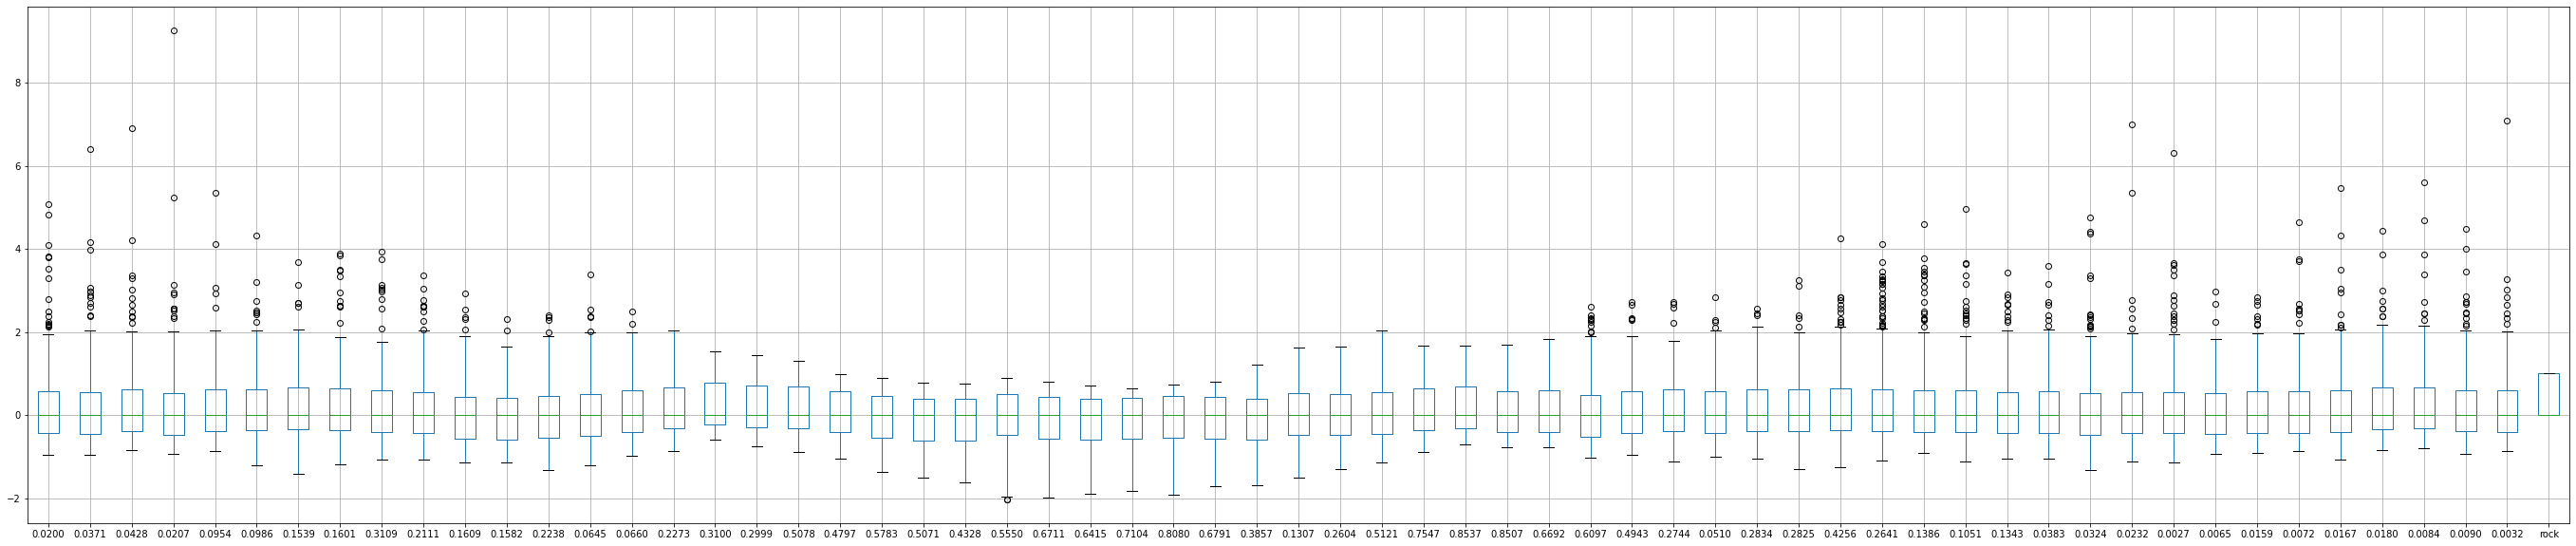

In [224]:
sonar_robust.boxplot(figsize=(48, 10))
plt.show()

In [225]:
corr = sonar.corr()
corr.style.background_gradient('coolwarm')

#### Split Train Test set

In [226]:
x = np.array(sonar_feature)
y = np.array(sonar_label).reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, shuffle=True, random_state=42)
displaySplitSet(x_train, x_test, y_train, y_test)

Training Set: (144, 60) (144,)
Test Set: (63, 60) (63,)


### Processing

In [227]:
QuickPrediction(x_train, x_test, y_train, y_test)


-SGD
True Set: [0 1 1 0 0 1 0 0 1 0]
Pred Set: [0 0 1 1 1 1 1 0 0 0]
ROC_AUC: 0.7453703703703703
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        36
           1       0.69      0.74      0.71        27

    accuracy                           0.75        63
   macro avg       0.74      0.75      0.74        63
weighted avg       0.75      0.75      0.75        63


-KNN
True Set: [0 1 1 0 0 1 0 0 1 0]
Pred Set: [0 0 1 1 0 1 0 0 0 0]
ROC_AUC: 0.7962962962962963
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        36
           1       0.83      0.70      0.76        27

    accuracy                           0.81        63
   macro avg       0.81      0.80      0.80        63
weighted avg       0.81      0.81      0.81        63


-RForest
True Set: [0 1 1 0 0 1 0 0 1 0]
Pred Set: [0 0 1 0 1 1 0 0 0 0]
ROC_AUC: 0.8287037037037037
              precision    recall  f1-score   su

## Optimization

In [228]:
from sklearn.model_selection import KFold, GridSearchCV
cv = KFold(n_splits=5)

In [229]:
from collections import Counter
counters = Counter(y)
print('Dataset Label Ratio:', counters)

Dataset Label Ratio: Counter({0: 111, 1: 96})


### Stochastic Gradient Descent

In [230]:
def processing(estimator, x_train, y_train, x_test, y_test):
  estimator.fit(x_train, y_train)
  y_pred = estimator.predict(x_test)
  print('True: ', y_test[:10])
  print('Pred: ', y_pred[:10])
  print('ROC_AUC:', roc_auc_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))

#### HyperParameter Tuning

In [231]:
params = {
    'loss':['hinge', 'log', 'perceptron'],
    'penalty':['l1', 'l2'],
    'max_iter':[800, 1000, 1300]
}

In [232]:
sgd = GridSearchCV(SGDClassifier(), params, cv=cv, scoring='roc_auc', verbose=0, return_train_score=True)
sgd.fit(x_train, y_train)
print('Best Score: ', sgd.best_score_) 
sgd.best_estimator_

Best Score:  0.8856073338426279


SGDClassifier(penalty='l1')

#### Best Estimate

In [233]:
processing(sgd.best_estimator_, x_train, y_train, x_test, y_test)

True:  [0 1 1 0 0 1 0 0 1 0]
Pred:  [0 0 1 1 1 1 0 0 0 0]
ROC_AUC: 0.787037037037037
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        36
           1       0.77      0.74      0.75        27

    accuracy                           0.79        63
   macro avg       0.79      0.79      0.79        63
weighted avg       0.79      0.79      0.79        63



### KNN

#### HyperParameter Tuning

In [234]:
params = {
    'n_neighbors':[2],
    'weights':['uniform', 'distance'],
    'algorithm':['ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10, 30, 60, 90],
    'p':[1, 2]
}

In [235]:
knn = GridSearchCV(KNeighborsClassifier(), params, cv=cv, scoring='roc_auc', verbose=0, return_train_score=True)
knn.fit(x_train, y_train)
print('Best Score: ', sgd.best_score_) 
knn.best_estimator_

Best Score:  0.8856073338426279


KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=2, p=1,
                     weights='distance')

#### Best Estimate

In [236]:
processing(knn.best_estimator_, x_train, y_train, x_test, y_test)

True:  [0 1 1 0 0 1 0 0 1 0]
Pred:  [0 0 1 1 0 1 0 0 1 1]
ROC_AUC: 0.8240740740740741
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        36
           1       0.79      0.81      0.80        27

    accuracy                           0.83        63
   macro avg       0.82      0.82      0.82        63
weighted avg       0.83      0.83      0.83        63



### SVM

#### HyperParameter Tuning

In [237]:
params = {
    'kernel':['linear', 'rbf', 'sigmoid'],
    'gamma':['scale', 'auto'],
    'decision_function_shape':['ovr', 'ovo'],
    'shrinking':[True, False],
    'probability':[True, False]
}

In [238]:
svc = GridSearchCV(SVC(), params, cv=cv, scoring='roc_auc', verbose=0, return_train_score=True)
svc.fit(x_train, y_train)
print('Best Score: ', svc.best_score_)
svc.best_estimator_

Best Score:  0.9102368220015279


SVC(probability=True)

#### Best Estimate

In [239]:
processing(svc.best_estimator_, x_train, y_train, x_test, y_test)

True:  [0 1 1 0 0 1 0 0 1 0]
Pred:  [0 0 1 0 0 1 0 0 0 1]
ROC_AUC: 0.7824074074074074
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        36
           1       0.79      0.70      0.75        27

    accuracy                           0.79        63
   macro avg       0.79      0.78      0.79        63
weighted avg       0.79      0.79      0.79        63

